In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # For splitting data

import matplotlib
import sklearn
import scipy
import numpy
import sys

print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

sns.set(color_codes=True)
plt.style.available
%precision 2

matplotlib: 3.3.2
sklearn: 0.23.2
scipy: 1.5.2
seaborn: 0.11.0
pandas: 1.1.3
numpy: 1.19.4
Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


'%.2f'

## Setting output rows and columns

In [2]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Taking csv file with different separater
Data separator from ';' to ','

In [3]:
#data = pd.read_csv('ethereum_csv.csv')
#data.columns

In [4]:
#numeric_features = data.select_dtypes(include = [np.number])

In [5]:
#correlation = numeric_features.corr()

In [6]:
# Convert original data to csv data with separater as ,
'''
data = pd.read_csv('ethereum.csv',sep=';')
data.columns
numeric_features = data.select_dtypes(include = [np.number])
non_numeric_features = data.select_dtypes(exclude = [np.number])
numeric_features.head()
non_numeric_features.head()
data.to_csv('ethereum_data.csv')
'''

"\ndata = pd.read_csv('ethereum.csv',sep=';')\ndata.columns\nnumeric_features = data.select_dtypes(include = [np.number])\nnon_numeric_features = data.select_dtypes(exclude = [np.number])\nnumeric_features.head()\nnon_numeric_features.head()\ndata.to_csv('ethereum_data.csv')\n"

## Read data file

In [3]:
data = pd.read_csv('ethereum_data.csv') #The dataset is uploaded to the CAMCOS google drive

In [4]:
data.shape

(2056, 41)

### drop all null data

In [5]:
#data = data.drop(index = [i for i in range(375)])

In [6]:
data = data.dropna()

In [7]:
data = data.reset_index(drop = True)

In [8]:
data.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,8/7/2016,20085,6077,8952576,1473.190061,9.122719e+08,5.360000e+13,0.000645,0.007107,0.00042,0.004630,27.696032,305.301693,3.769247,32294.84375,14.243392,355995.7729,32294.84375,355995.7729,41.895113,25.676865,0.018535,11.023301,818.616045,-2.875925,82758505.66,200115888.1,80338437.81,42955,51113,1975373.722,21775138.48,62.183892,685.471741,1.001421,11.038961,3178405.281,35036517.08,0.084586,0.091806,0.096353
1,8/8/2016,20439,6059,9111556,1503.805248,9.363531e+08,5.480000e+13,0.001254,0.014181,0.00042,0.004750,53.896575,609.564064,3.845016,32175.93750,14.185434,363906.1494,32175.93750,363906.1494,41.476742,26.309202,0.019117,11.309885,842.498262,3.258575,82790681.59,200458024.1,80365076.47,42984,75328,1996074.839,22575376.67,39.049717,441.647804,0.147550,1.668772,2941537.082,33268445.80,0.084186,0.091690,0.096432
2,8/9/2016,22799,6130,9757894,1591.826101,1.019313e+09,5.680000e+13,0.000669,0.008232,0.00042,0.005169,31.476820,387.387553,4.026739,32666.40625,14.395987,402027.8740,32666.40625,402027.8740,23.231663,28.501093,0.020933,12.307074,925.598034,12.274988,82823348.00,201198238.5,80397742.88,47057,55293,3565106.361,43876027.25,100.900193,1241.786121,1.003216,12.346657,5579074.348,68662079.99,0.081587,0.092947,0.097002
3,8/10/2016,21183,6054,9727492,1606.787578,1.002104e+09,5.890000e+13,0.000722,0.008733,0.00042,0.005080,33.422242,404.228564,4.124060,32162.96875,14.168621,388998.1577,32162.96875,388998.1577,18.237591,27.804614,0.020500,12.094597,1121.676503,14.461676,82855510.97,201485552.9,80425443.19,46290,52842,4543117.061,54947171.72,132.054508,1597.146110,1.003051,12.131497,6978024.323,84396394.72,0.081409,0.092723,0.096978
4,8/11/2016,22502,6068,9833228,1620.505603,9.702305e+08,6.010000e+13,0.000666,0.007797,0.00042,0.004916,32.086722,375.586648,4.222562,32196.09375,14.177705,376866.8875,32196.09375,376866.8875,23.096806,27.319899,0.019854,11.705361,808.801289,10.916083,82887707.06,201169569.2,80457639.28,48171,55715,3588708.648,42007128.84,105.464380,1234.498595,1.001092,11.718140,5875947.911,68780089.21,0.081366,0.092968,0.096048


In [9]:
data.shape

(1682, 41)

In [10]:
# Checking null data
data.isnull().sum()

date                  0
AdrActCnt             0
BlkCnt                0
BlkSizeByte           0
BlkSizeMeanByte       0
CapMrktCurUSD         0
DiffMean              0
FeeMeanNtv            0
FeeMeanUSD            0
FeeMedNtv             0
FeeMedUSD             0
FeeTotNtv             0
FeeTotUSD             0
HashRate              0
IssContNtv            0
IssContPctAnn         0
IssContUSD            0
IssTotNtv             0
IssTotUSD             0
NVTAdj                0
NVTAdj90              0
PriceBTC              0
PriceUSD              0
ROI1yr                0
ROI30d                0
SplyCur               0
SplyExpFut10yrCMBI    0
SplyFF                0
TxCnt                 0
TxTfrCnt              0
TxTfrValAdjNtv        0
TxTfrValAdjUSD        0
TxTfrValMeanNtv       0
TxTfrValMeanUSD       0
TxTfrValMedNtv        0
TxTfrValMedUSD        0
TxTfrValNtv           0
TxTfrValUSD           0
VtyDayRet180d         0
VtyDayRet30d          0
VtyDayRet60d          0
dtype: int64

In [11]:
# setting y variable
# setting block size
# The sum USD value of all fees paid to miners, transaction validators, stakers and/or block producers that day.
y = data['FeeTotUSD']

In [12]:
#data = data.drop(labels = ['BlkSizeByte'], axis = 1)

In [13]:
numeric_features = data.select_dtypes(include = [np.number])
correlation = numeric_features.corr()
print(correlation['FeeTotUSD'].sort_values(ascending = False))

FeeTotUSD             1.000000
FeeMeanUSD            0.997554
FeeMedUSD             0.997229
TxTfrValAdjUSD        0.854589
FeeTotNtv             0.809931
CapMrktCurUSD         0.802488
FeeMedNtv             0.778795
PriceUSD              0.758094
FeeMeanNtv            0.757958
TxTfrValUSD           0.648092
IssContUSD            0.589143
IssTotUSD             0.589143
BlkSizeByte           0.537964
HashRate              0.533967
BlkSizeMeanByte       0.521457
TxTfrCnt              0.503064
DiffMean              0.488874
TxCnt                 0.477438
TxTfrValAdjNtv        0.446555
TxTfrValMedUSD        0.397930
SplyCur               0.361381
TxTfrValMeanUSD       0.354455
SplyFF                0.325961
AdrActCnt             0.219022
BlkCnt                0.195792
TxTfrValNtv           0.130679
ROI30d                0.117208
VtyDayRet30d          0.061594
VtyDayRet60d          0.044829
ROI1yr                0.003064
PriceBTC             -0.018001
TxTfrValMedNtv       -0.099732
TxTfrVal

In [14]:
new_data=data.drop(['FeeMeanUSD','FeeMedUSD','TxTfrValAdjUSD','FeeTotNtv','FeeTotUSD','CapMrktCurUSD','FeeMedNtv','FeeMeanNtv','PriceUSD'],axis =1)

In [15]:
print(data.shape)
print(new_data.shape)

(1682, 41)
(1682, 32)


In [16]:
new_data.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,DiffMean,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,8/7/2016,20085,6077,8952576,1473.190061,5.360000e+13,3.769247,32294.84375,14.243392,355995.7729,32294.84375,355995.7729,41.895113,25.676865,0.018535,818.616045,-2.875925,82758505.66,200115888.1,80338437.81,42955,51113,1975373.722,62.183892,685.471741,1.001421,11.038961,3178405.281,35036517.08,0.084586,0.091806,0.096353
1,8/8/2016,20439,6059,9111556,1503.805248,5.480000e+13,3.845016,32175.93750,14.185434,363906.1494,32175.93750,363906.1494,41.476742,26.309202,0.019117,842.498262,3.258575,82790681.59,200458024.1,80365076.47,42984,75328,1996074.839,39.049717,441.647804,0.147550,1.668772,2941537.082,33268445.80,0.084186,0.091690,0.096432
2,8/9/2016,22799,6130,9757894,1591.826101,5.680000e+13,4.026739,32666.40625,14.395987,402027.8740,32666.40625,402027.8740,23.231663,28.501093,0.020933,925.598034,12.274988,82823348.00,201198238.5,80397742.88,47057,55293,3565106.361,100.900193,1241.786121,1.003216,12.346657,5579074.348,68662079.99,0.081587,0.092947,0.097002
3,8/10/2016,21183,6054,9727492,1606.787578,5.890000e+13,4.124060,32162.96875,14.168621,388998.1577,32162.96875,388998.1577,18.237591,27.804614,0.020500,1121.676503,14.461676,82855510.97,201485552.9,80425443.19,46290,52842,4543117.061,132.054508,1597.146110,1.003051,12.131497,6978024.323,84396394.72,0.081409,0.092723,0.096978
4,8/11/2016,22502,6068,9833228,1620.505603,6.010000e+13,4.222562,32196.09375,14.177705,376866.8875,32196.09375,376866.8875,23.096806,27.319899,0.019854,808.801289,10.916083,82887707.06,201169569.2,80457639.28,48171,55715,3588708.648,105.464380,1234.498595,1.001092,11.718140,5875947.911,68780089.21,0.081366,0.092968,0.096048


In [17]:
x_train,x_test,y_train,y_test = train_test_split(new_data,y,test_size = 0.33, random_state = 42)

In [18]:
x_train.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,DiffMean,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
730,8/7/2018,323836,5875,116345405,19803.473190,3.570000e+15,242.499540,20398.31250,7.358114,7.721978e+06,20398.31250,7.721978e+06,77.399061,43.336812,0.056312,40.391312,-22.128231,1.011860e+08,177034999.0,9.883301e+07,636342,531652,1307328.988,2.858106,1081.963617,0.060000,22.713578,1.519518e+06,5.752281e+08,0.048451,0.036166,0.043178
786,10/2/2018,237819,6180,148979852,24106.772170,3.210000e+15,229.717982,20514.18750,7.317192,4.622678e+06,20514.18750,4.622678e+06,98.225588,45.883780,0.034621,-23.969850,-23.298253,1.023299e+08,177180688.4,9.998052e+07,490262,309898,1041785.000,3.883886,875.196936,0.102723,23.147616,1.203608e+06,2.712218e+08,0.051483,0.065826,0.056898
243,4/7/2017,33358,5946,16508427,2776.392028,2.500000e+14,17.176276,31074.53125,12.531996,1.318535e+06,31074.53125,1.318535e+06,36.285302,49.203856,0.035605,320.432571,154.418028,9.050597e+07,204653094.1,8.832329e+07,92846,78496,2494287.279,74.918822,3178.909104,1.003932,42.598202,5.880828e+06,2.495316e+08,0.061817,0.117762,0.090200
1671,3/5/2021,524802,6525,300977970,46126.891950,5.390000e+15,406.788709,13569.12500,4.309312,2.077216e+07,13569.12500,2.077216e+07,29.630638,26.156808,0.031369,571.970529,-7.754035,1.149309e+08,163816810.0,1.106907e+08,1208640,740267,3878785.352,7.588157,11616.257150,0.150000,229.626044,5.617263e+06,8.599132e+09,0.050443,0.048431,0.062459
312,6/15/2017,142301,5305,43457704,8191.838643,7.280000e+14,44.734447,28198.75000,11.124923,9.647338e+06,28198.75000,9.647338e+06,16.873752,60.173381,0.141965,1758.401976,287.634299,9.251788e+07,196362290.8,9.048021e+07,261617,254234,5482946.868,84.331928,28851.583310,0.990000,338.698144,2.144004e+07,7.335053e+09,0.075322,0.090287,0.084536


In [19]:
print(x_train.iloc[0,:])
print(y_train.iloc[0])

date                     8/7/2018
AdrActCnt                  323836
BlkCnt                       5875
BlkSizeByte             116345405
BlkSizeMeanByte           19803.5
DiffMean                 3.57e+15
HashRate                    242.5
IssContNtv                20398.3
IssContPctAnn             7.35811
IssContUSD            7.72198e+06
IssTotNtv                 20398.3
IssTotUSD             7.72198e+06
NVTAdj                    77.3991
NVTAdj90                  43.3368
PriceBTC                0.0563117
ROI1yr                    40.3913
ROI30d                   -22.1282
SplyCur               1.01186e+08
SplyExpFut10yrCMBI    1.77035e+08
SplyFF                 9.8833e+07
TxCnt                      636342
TxTfrCnt                   531652
TxTfrValAdjNtv        1.30733e+06
TxTfrValMeanNtv           2.85811
TxTfrValMeanUSD           1081.96
TxTfrValMedNtv               0.06
TxTfrValMedUSD            22.7136
TxTfrValNtv           1.51952e+06
TxTfrValUSD           5.75228e+08
VtyDayRet180d 

In [20]:
numeric_features = data.select_dtypes(include = [np.number])
non_numeric_features = data.select_dtypes(exclude = [np.number])

In [21]:
numeric_features.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,20085,6077,8952576,1473.190061,9.122719e+08,5.360000e+13,0.000645,0.007107,0.00042,0.004630,27.696032,305.301693,3.769247,32294.84375,14.243392,355995.7729,32294.84375,355995.7729,41.895113,25.676865,0.018535,11.023301,818.616045,-2.875925,82758505.66,200115888.1,80338437.81,42955,51113,1975373.722,21775138.48,62.183892,685.471741,1.001421,11.038961,3178405.281,35036517.08,0.084586,0.091806,0.096353
1,20439,6059,9111556,1503.805248,9.363531e+08,5.480000e+13,0.001254,0.014181,0.00042,0.004750,53.896575,609.564064,3.845016,32175.93750,14.185434,363906.1494,32175.93750,363906.1494,41.476742,26.309202,0.019117,11.309885,842.498262,3.258575,82790681.59,200458024.1,80365076.47,42984,75328,1996074.839,22575376.67,39.049717,441.647804,0.147550,1.668772,2941537.082,33268445.80,0.084186,0.091690,0.096432
2,22799,6130,9757894,1591.826101,1.019313e+09,5.680000e+13,0.000669,0.008232,0.00042,0.005169,31.476820,387.387553,4.026739,32666.40625,14.395987,402027.8740,32666.40625,402027.8740,23.231663,28.501093,0.020933,12.307074,925.598034,12.274988,82823348.00,201198238.5,80397742.88,47057,55293,3565106.361,43876027.25,100.900193,1241.786121,1.003216,12.346657,5579074.348,68662079.99,0.081587,0.092947,0.097002
3,21183,6054,9727492,1606.787578,1.002104e+09,5.890000e+13,0.000722,0.008733,0.00042,0.005080,33.422242,404.228564,4.124060,32162.96875,14.168621,388998.1577,32162.96875,388998.1577,18.237591,27.804614,0.020500,12.094597,1121.676503,14.461676,82855510.97,201485552.9,80425443.19,46290,52842,4543117.061,54947171.72,132.054508,1597.146110,1.003051,12.131497,6978024.323,84396394.72,0.081409,0.092723,0.096978
4,22502,6068,9833228,1620.505603,9.702305e+08,6.010000e+13,0.000666,0.007797,0.00042,0.004916,32.086722,375.586648,4.222562,32196.09375,14.177705,376866.8875,32196.09375,376866.8875,23.096806,27.319899,0.019854,11.705361,808.801289,10.916083,82887707.06,201169569.2,80457639.28,48171,55715,3588708.648,42007128.84,105.464380,1234.498595,1.001092,11.718140,5875947.911,68780089.21,0.081366,0.092968,0.096048


In [22]:
non_numeric_features.head()

,date
0,8/7/2016
1,8/8/2016
2,8/9/2016
3,8/10/2016
4,8/11/2016


In [23]:
len(x_train.index)

1126

In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 730 to 1126
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1126 non-null   object 
 1   AdrActCnt           1126 non-null   int64  
 2   BlkCnt              1126 non-null   int64  
 3   BlkSizeByte         1126 non-null   int64  
 4   BlkSizeMeanByte     1126 non-null   float64
 5   DiffMean            1126 non-null   float64
 6   HashRate            1126 non-null   float64
 7   IssContNtv          1126 non-null   float64
 8   IssContPctAnn       1126 non-null   float64
 9   IssContUSD          1126 non-null   float64
 10  IssTotNtv           1126 non-null   float64
 11  IssTotUSD           1126 non-null   float64
 12  NVTAdj              1126 non-null   float64
 13  NVTAdj90            1126 non-null   float64
 14  PriceBTC            1126 non-null   float64
 15  ROI1yr              1126 non-null   float64
 16  ROI3

In [25]:
print(type((data.columns)))
data.columns

<class 'pandas.core.indexes.base.Index'>


Index(['date', 'AdrActCnt', 'BlkCnt', 'BlkSizeByte', 'BlkSizeMeanByte', 'CapMrktCurUSD', 'DiffMean', 'FeeMeanNtv', 'FeeMeanUSD', 'FeeMedNtv', 'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD', 'HashRate', 'IssContNtv', 'IssContPctAnn', 'IssContUSD', 'IssTotNtv', 'IssTotUSD', 'NVTAdj', 'NVTAdj90', 'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d', 'SplyCur', 'SplyExpFut10yrCMBI', 'SplyFF', 'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv', 'TxTfrValAdjUSD', 'TxTfrValMeanNtv', 'TxTfrValMeanUSD', 'TxTfrValMedNtv', 'TxTfrValMedUSD', 'TxTfrValNtv', 'TxTfrValUSD', 'VtyDayRet180d', 'VtyDayRet30d', 'VtyDayRet60d'], dtype='object')

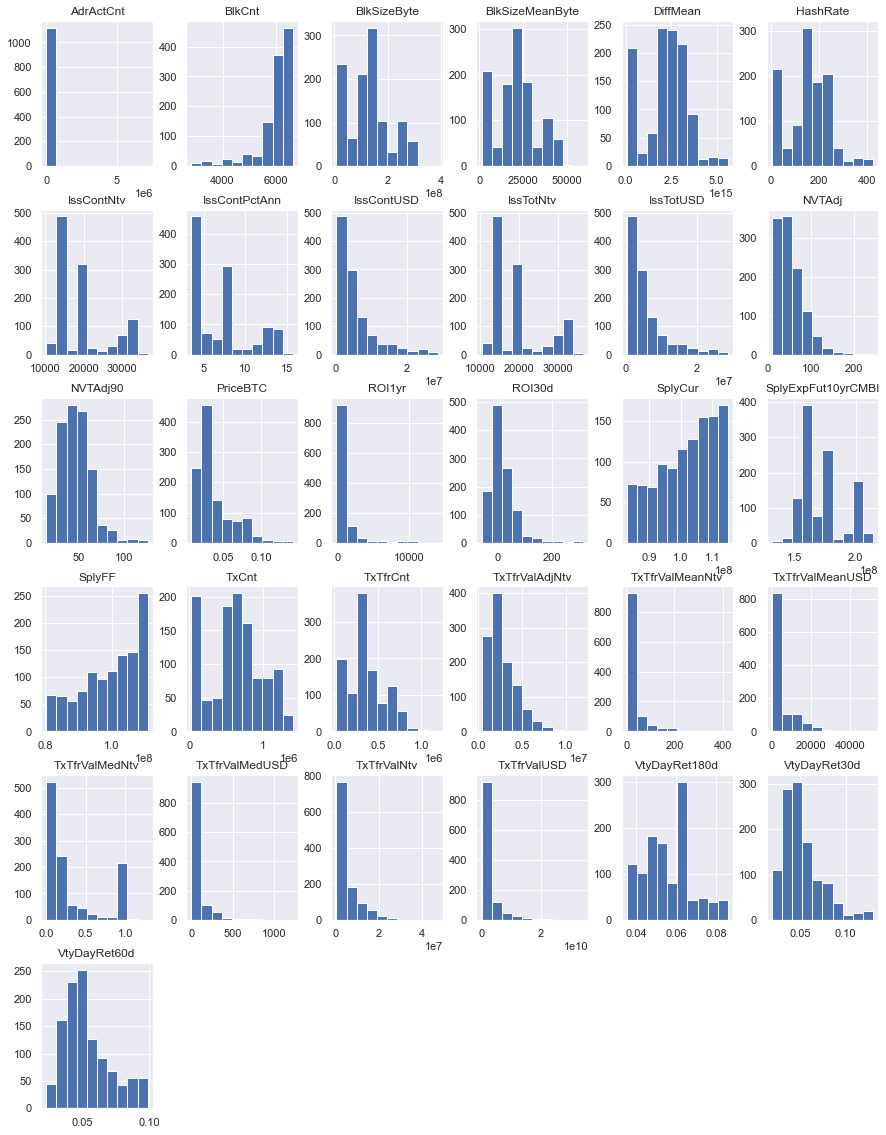

In [26]:
x_train.hist(figsize = (15,20));

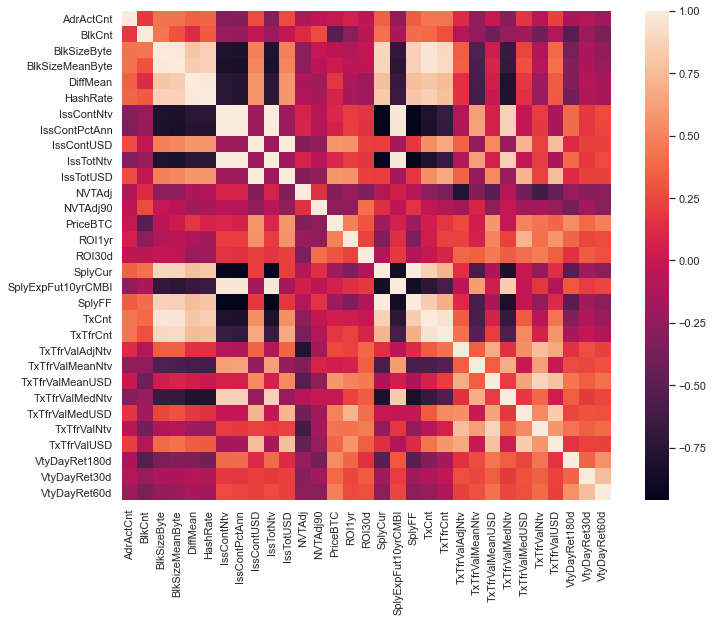

In [27]:
# correlation matrix

corrmat = x_train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True);

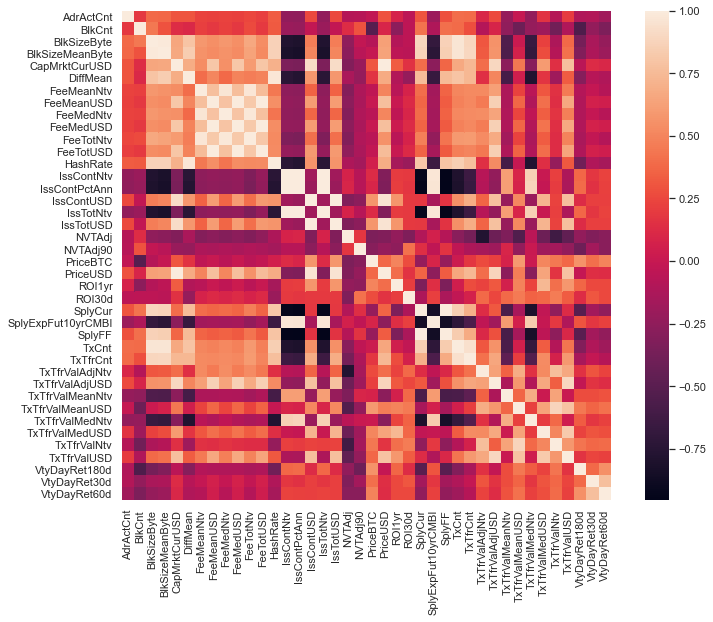

In [58]:
corrmat = data.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True);
plt.savefig('blk_info.png')

In [28]:
train_date = x_train['date']
test_date = x_test['date']
x_train = x_train.drop('date',axis = 1)
x_test = x_test.drop('date',axis = 1)

x_train.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,DiffMean,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
730,323836,5875,116345405,19803.473190,3.570000e+15,242.499540,20398.31250,7.358114,7.721978e+06,20398.31250,7.721978e+06,77.399061,43.336812,0.056312,40.391312,-22.128231,1.011860e+08,177034999.0,9.883301e+07,636342,531652,1307328.988,2.858106,1081.963617,0.060000,22.713578,1.519518e+06,5.752281e+08,0.048451,0.036166,0.043178
786,237819,6180,148979852,24106.772170,3.210000e+15,229.717982,20514.18750,7.317192,4.622678e+06,20514.18750,4.622678e+06,98.225588,45.883780,0.034621,-23.969850,-23.298253,1.023299e+08,177180688.4,9.998052e+07,490262,309898,1041785.000,3.883886,875.196936,0.102723,23.147616,1.203608e+06,2.712218e+08,0.051483,0.065826,0.056898
243,33358,5946,16508427,2776.392028,2.500000e+14,17.176276,31074.53125,12.531996,1.318535e+06,31074.53125,1.318535e+06,36.285302,49.203856,0.035605,320.432571,154.418028,9.050597e+07,204653094.1,8.832329e+07,92846,78496,2494287.279,74.918822,3178.909104,1.003932,42.598202,5.880828e+06,2.495316e+08,0.061817,0.117762,0.090200
1671,524802,6525,300977970,46126.891950,5.390000e+15,406.788709,13569.12500,4.309312,2.077216e+07,13569.12500,2.077216e+07,29.630638,26.156808,0.031369,571.970529,-7.754035,1.149309e+08,163816810.0,1.106907e+08,1208640,740267,3878785.352,7.588157,11616.257150,0.150000,229.626044,5.617263e+06,8.599132e+09,0.050443,0.048431,0.062459
312,142301,5305,43457704,8191.838643,7.280000e+14,44.734447,28198.75000,11.124923,9.647338e+06,28198.75000,9.647338e+06,16.873752,60.173381,0.141965,1758.401976,287.634299,9.251788e+07,196362290.8,9.048021e+07,261617,254234,5482946.868,84.331928,28851.583310,0.990000,338.698144,2.144004e+07,7.335053e+09,0.075322,0.090287,0.084536


In [29]:
x_test.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,DiffMean,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
1393,411586,6475,189464623,29260.945640,2.330000e+15,174.493262,13683.37500,4.492785,3.166936e+06,13683.37500,3.166936e+06,51.290361,65.113675,0.024533,-12.708787,8.805468,1.111613e+08,160527540.6,1.089056e+08,850103,486486,2.167293e+06,5.290895,1224.546239,0.060369,13.972158,2573946.526,5.957246e+08,0.064935,0.040413,0.046917
743,336770,5932,149092855,25133.657280,3.490000e+15,239.943988,20446.21875,7.356064,5.553543e+06,20446.21875,5.553543e+06,74.044892,35.198891,0.043300,-8.837024,-41.206739,1.014519e+08,176668249.8,9.909891e+07,663769,398966,1.370141e+06,4.002084,1087.034579,0.071735,19.484453,1596695.600,4.336898e+08,0.049329,0.045324,0.044888
1605,520345,6410,287497357,44851.381750,3.780000e+15,280.754287,13298.37500,4.256395,9.733563e+06,13298.37500,9.733563e+06,20.528747,40.554875,0.026879,457.506603,27.321267,1.140380e+08,163126614.6,1.099065e+08,1206703,660869,5.555038e+06,11.161491,8169.500656,0.161059,117.885096,7376283.647,5.398970e+09,0.041322,0.042046,0.042176
49,20158,6267,8689564,1386.558800,7.550000e+13,5.473934,34394.21875,14.885221,4.500673e+05,34394.21875,4.500673e+05,30.230823,32.960879,0.021787,1598.716107,16.012097,8.433795e+07,208272344.7,8.190649e+07,38713,45188,2.789800e+06,97.373798,1274.189697,1.020964,13.359873,4400127.195,5.757808e+07,0.067900,0.035490,0.057764
188,16194,6038,9624141,1593.928619,1.250000e+14,8.716576,31589.84375,12.986379,3.627628e+05,31589.84375,3.627628e+05,121.541591,80.932128,0.011354,109.920991,17.511417,8.878759e+07,205297208.0,8.643613e+07,46560,43238,7.305120e+05,23.592349,270.923357,1.004548,11.535752,1020086.001,1.171418e+07,0.036034,0.020437,0.038654


In [30]:
train_date.head()

730      8/7/2018
786     10/2/2018
243      4/7/2017
1671     3/5/2021
312     6/15/2017
Name: date, dtype: object

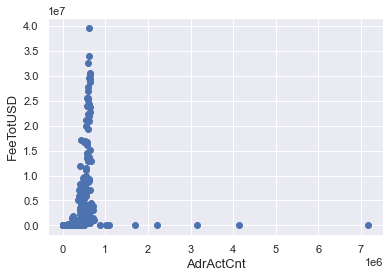

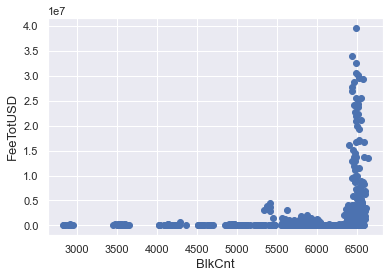

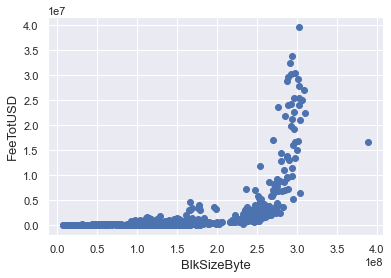

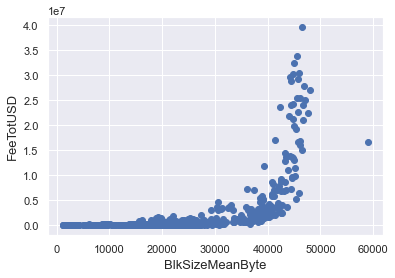

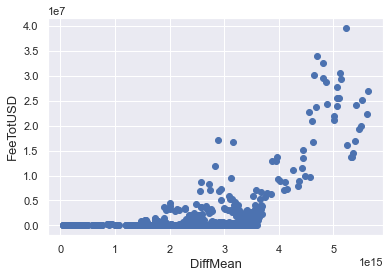

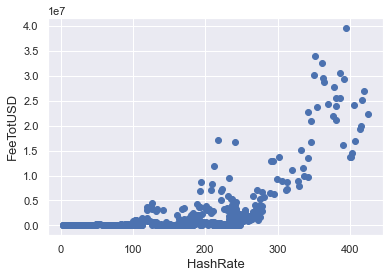

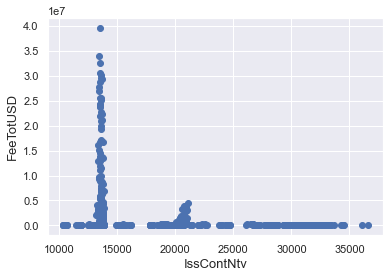

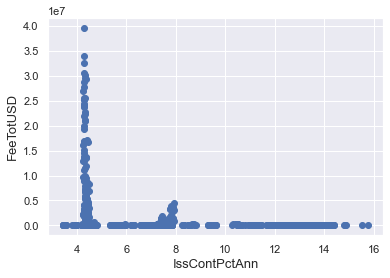

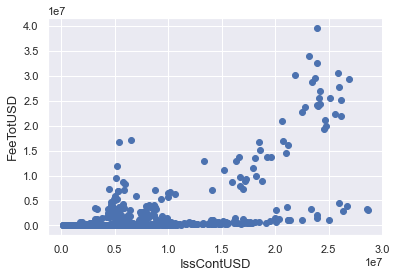

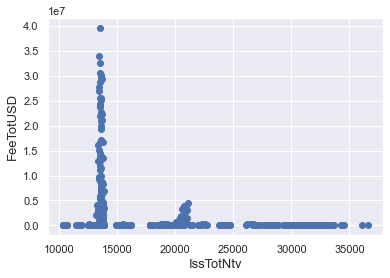

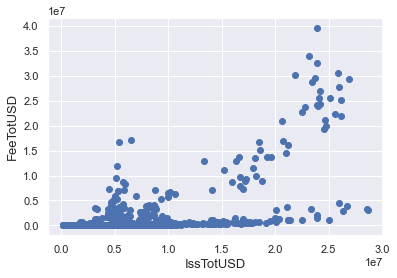

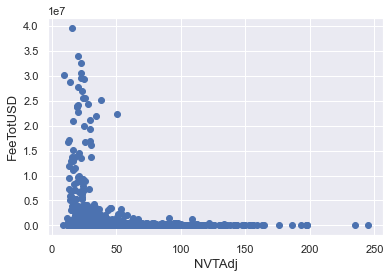

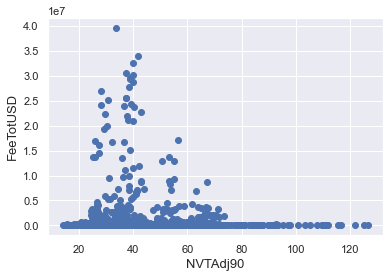

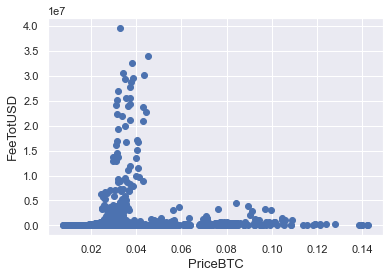

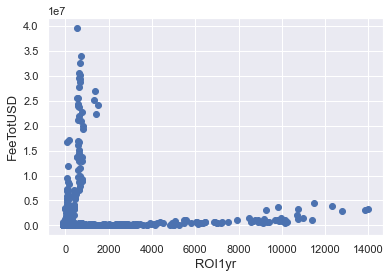

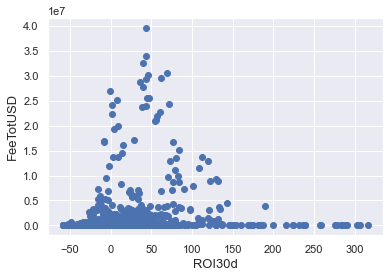

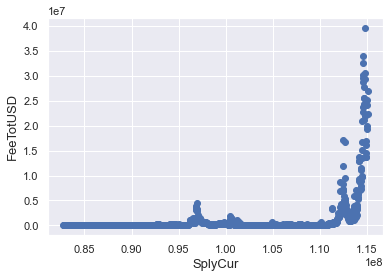

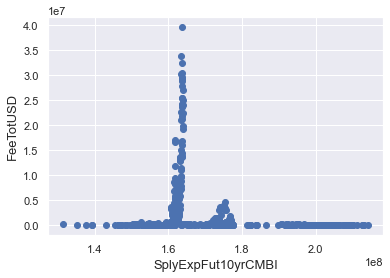

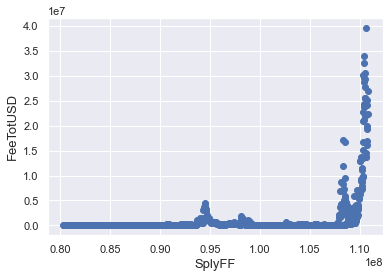

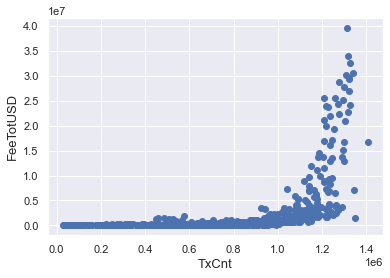

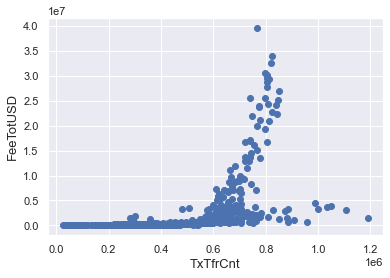

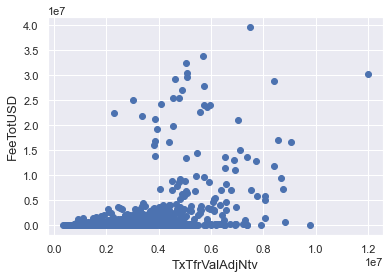

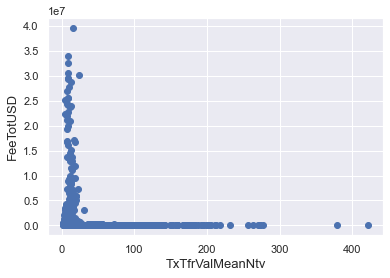

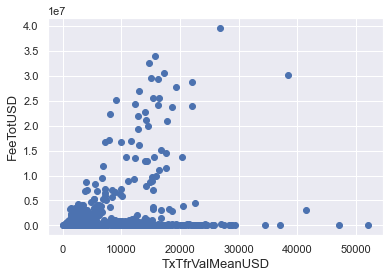

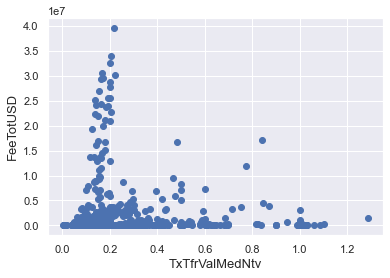

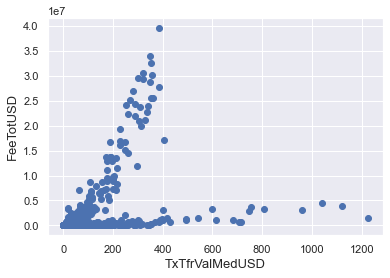

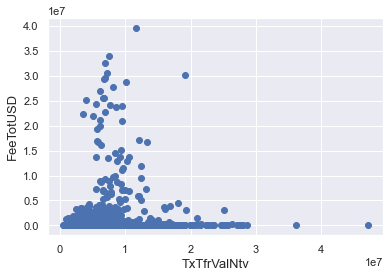

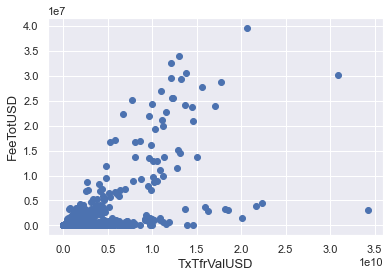

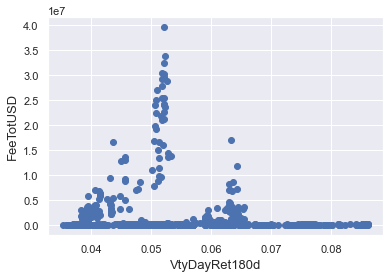

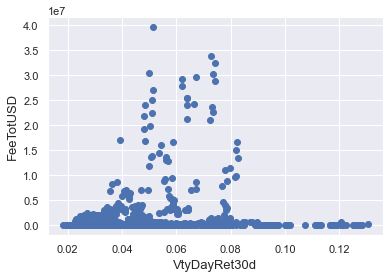

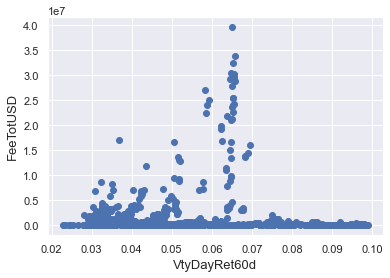

In [31]:
for i in list(x_train.columns):
    plt.scatter(x = x_train[i],y = y_train)
    plt.ylabel('FeeTotUSD',fontsize = 13)
    plt.xlabel(i,fontsize = 13)
    plt.show()

C:\Users\a2279\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


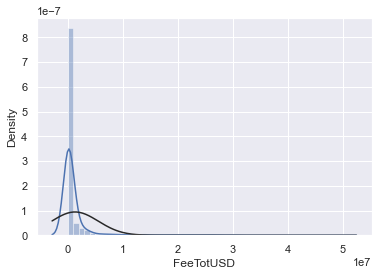

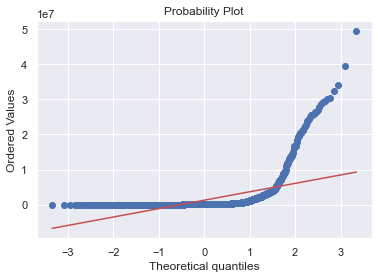

In [60]:
sns.distplot(y,fit=stats.norm);
fig = plt.figure()
res = stats.probplot(y,plot=plt)
plt.savefig('pp_orig.png')

In [33]:
copy_y_train = y_train.values

In [34]:
y_train = copy_y_train

C:\Users\a2279\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


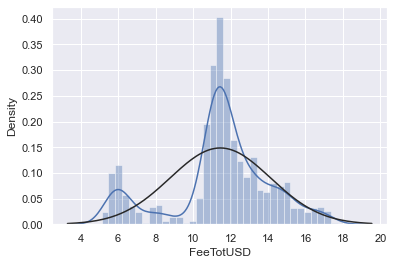

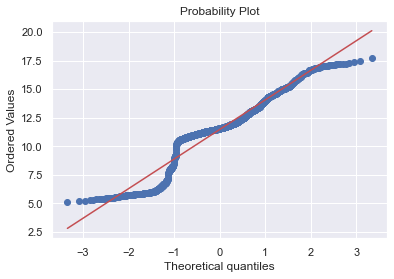

In [61]:
y_train = np.log(y)
sns.distplot(y_train,fit = stats.norm)
fig=plt.figure();
res = stats.probplot(y_train,plot = plt)
plt.savefig('pp_log.png')

In [36]:
y.head()

0    305.301693
1    609.564064
2    387.387553
3    404.228564
4    375.586648
Name: FeeTotUSD, dtype: float64

In [37]:
y

0       3.053017e+02
1       6.095641e+02
2       3.873876e+02
3       4.042286e+02
4       3.755866e+02
            ...     
1677    1.941113e+07
1678    2.404734e+07
1679    2.505188e+07
1680    2.235458e+07
1681    2.698504e+07
Name: FeeTotUSD, Length: 1682, dtype: float64

In [38]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [41]:
new_data.shape

(1682, 32)

In [42]:
new_data_nodate = new_data.drop(labels='date',axis=1)

In [43]:
n_folds = 5

def mse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(data.values)
    nmse= np.sqrt(-cross_val_score(model, new_data_nodate.values, y_train, scoring="neg_mean_squared_error", cv = kf, error_score='raise'))
    return nmse

In [44]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)

score = mse_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 1.3958 (1.3026)



In [45]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
#droping corr data


In [46]:
# XGBoost

model_xgb.fit(new_data_nodate, y_train)
xgb_train_pred = model_xgb.predict(new_data_nodate)
xgb_pred = np.exp(model_xgb.predict(x_test))
#xgb_pred = np.expm1(model_xgb.predict(test))
print(rmse(y_train, xgb_train_pred))
xgb_pred.max(), xgb_pred.min()

0.09648956521667486


(42601172.0, 173.45523)

In [62]:
orig = []
for i in y_test:
    orig.append(i)

In [63]:
for i in range(len(y_test)):
    print(orig[i]-xgb_pred[i])

-38095.64640000003
-5456.931137499996
-876543.4629999995
90.90239000000008
19.39842512070311
-2808.960450000013
6615.538138750002
-21008.86957499999
-603848.773
77.93204749999859
1364.3906374999933
-3608.037802499999
-10414.815199999997
12019.916999999434
-1606.1171387500071
-106.83355940625097
-25.523962275781287
-3932.798887500001
-6542.744364999991
38109.61420000001
-160269.7200000002
19254.650250000006
-1153464.2750000004
-355712.0110000004
7877.417924999987
-1831.0040431249981
-2281.1081074999965
-4365.919439999998
-2570044.6400000006
87867.01000000001
-14064.312800000014
-2877.1026724999974
-21049.496649999986
-894.5974624999944
208.19490750000114
-1830.153600000005
1469.3767599999992
-27.866601426562454
3865.7744349999994
6.330985461718797
9013.084926249998
-11016.006877499996
21.524575418359404
2847.384792500001
-26795.7537
-1288407.629999999
-91740.05539999995
2344.5286774999986
17.33721684062499
11451.405150000006
-71.08574634375009
-106.48813212812507
-7317.159834999999
-116

In [68]:
d = {'orig':orig,'pred':xgb_pred}

In [69]:
df = pd.DataFrame(d)

<AxesSubplot:>

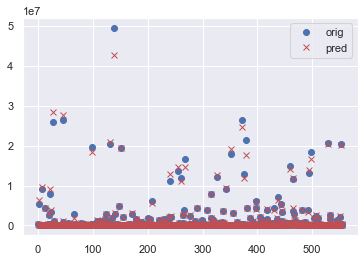

In [70]:
df.plot(style=['o','rx'])

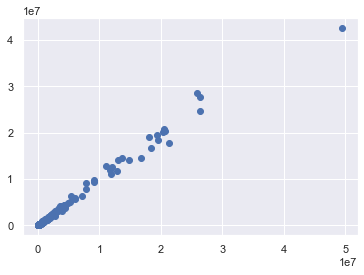

In [71]:
plt.scatter(orig,xgb_pred)
plt.show()

In [72]:
df

,orig,pred
0,3.638269e+05,4.019225e+05
1,1.103880e+05,1.158449e+05
2,5.431850e+06,6.308393e+06
3,8.785665e+02,7.876641e+02
4,4.420690e+02,4.226706e+02
...,...,...
551,6.225590e+04,6.158117e+04
552,7.970170e+04,8.515189e+04
553,2.033383e+07,2.015871e+07
554,3.268586e+05,3.200774e+05


In [73]:
x_train

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,DiffMean,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
730,323836,5875,116345405,19803.473190,3.570000e+15,242.499540,20398.31250,7.358114,7.721978e+06,20398.31250,7.721978e+06,77.399061,43.336812,0.056312,40.391312,-22.128231,1.011860e+08,177034999.0,9.883301e+07,636342,531652,1.307329e+06,2.858106,1081.963617,0.060000,22.713578,1.519518e+06,5.752281e+08,0.048451,0.036166,0.043178
786,237819,6180,148979852,24106.772170,3.210000e+15,229.717982,20514.18750,7.317192,4.622678e+06,20514.18750,4.622678e+06,98.225588,45.883780,0.034621,-23.969850,-23.298253,1.023299e+08,177180688.4,9.998052e+07,490262,309898,1.041785e+06,3.883886,875.196936,0.102723,23.147616,1.203608e+06,2.712218e+08,0.051483,0.065826,0.056898
243,33358,5946,16508427,2776.392028,2.500000e+14,17.176276,31074.53125,12.531996,1.318535e+06,31074.53125,1.318535e+06,36.285302,49.203856,0.035605,320.432571,154.418028,9.050597e+07,204653094.1,8.832329e+07,92846,78496,2.494287e+06,74.918822,3178.909104,1.003932,42.598202,5.880828e+06,2.495316e+08,0.061817,0.117762,0.090200
1671,524802,6525,300977970,46126.891950,5.390000e+15,406.788709,13569.12500,4.309312,2.077216e+07,13569.12500,2.077216e+07,29.630638,26.156808,0.031369,571.970529,-7.754035,1.149309e+08,163816810.0,1.106907e+08,1208640,740267,3.878785e+06,7.588157,11616.257150,0.150000,229.626044,5.617263e+06,8.599132e+09,0.050443,0.048431,0.062459
312,142301,5305,43457704,8191.838643,7.280000e+14,44.734447,28198.75000,11.124923,9.647338e+06,28198.75000,9.647338e+06,16.873752,60.173381,0.141965,1758.401976,287.634299,9.251788e+07,196362290.8,9.048021e+07,261617,254234,5.482947e+06,84.331928,28851.583310,0.990000,338.698144,2.144004e+07,7.335053e+09,0.075322,0.090287,0.084536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,295327,6437,127457361,19800.739630,2.260000e+15,168.544710,13547.31250,4.590970,2.412219e+06,13547.31250,2.412219e+06,62.544608,42.908011,0.017556,-3.388350,-15.600916,1.077036e+08,156861679.2,1.054250e+08,705292,297085,1.722028e+06,6.842444,1218.357809,0.122870,21.878092,2.032788e+06,3.619558e+08,0.044844,0.035056,0.042801
1294,314925,6528,130585383,20003.888330,2.280000e+15,172.163410,13672.50000,4.544615,3.578960e+06,13672.50000,3.578960e+06,115.774783,109.709835,0.027055,77.993672,61.426359,1.098119e+08,159262057.0,1.075473e+08,605859,315424,9.484958e+05,3.519405,921.251394,0.039765,10.409089,1.110105e+06,2.905848e+08,0.038014,0.041281,0.039218
860,378120,6115,102710251,16796.443340,2.220000e+15,157.318785,19813.78125,6.965934,1.641179e+06,19813.78125,1.641179e+06,62.240682,24.171911,0.026006,-87.986297,-53.357676,1.038200e+08,175325968.3,1.014845e+08,551916,320833,1.668040e+06,6.232290,516.221748,0.108679,9.001941,1.999524e+06,1.656210e+08,0.049235,0.059719,0.048592
1459,611242,6457,253266860,39223.611580,2.450000e+15,183.371817,13572.81250,4.420880,5.437285e+06,13572.81250,5.437285e+06,41.477258,71.652456,0.034177,77.469762,66.101137,1.120600e+08,161417286.4,1.079961e+08,1182699,777929,2.701721e+06,4.576582,1833.384119,0.094216,37.743126,3.560256e+06,1.426243e+09,0.064143,0.033658,0.031121


In [74]:
x_test

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,DiffMean,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
1393,411586,6475,189464623,29260.945640,2.330000e+15,174.493262,13683.37500,4.492785,3.166936e+06,13683.37500,3.166936e+06,51.290361,65.113675,0.024533,-12.708787,8.805468,1.111613e+08,160527540.6,1.089056e+08,850103,486486,2.167293e+06,5.290895,1224.546239,0.060369,13.972158,2.573947e+06,5.957246e+08,0.064935,0.040413,0.046917
743,336770,5932,149092855,25133.657280,3.490000e+15,239.943988,20446.21875,7.356064,5.553543e+06,20446.21875,5.553543e+06,74.044892,35.198891,0.043300,-8.837024,-41.206739,1.014519e+08,176668249.8,9.909891e+07,663769,398966,1.370141e+06,4.002084,1087.034579,0.071735,19.484453,1.596696e+06,4.336898e+08,0.049329,0.045324,0.044888
1605,520345,6410,287497357,44851.381750,3.780000e+15,280.754287,13298.37500,4.256395,9.733563e+06,13298.37500,9.733563e+06,20.528747,40.554875,0.026879,457.506603,27.321267,1.140380e+08,163126614.6,1.099065e+08,1206703,660869,5.555038e+06,11.161491,8169.500656,0.161059,117.885096,7.376284e+06,5.398970e+09,0.041322,0.042046,0.042176
49,20158,6267,8689564,1386.558800,7.550000e+13,5.473934,34394.21875,14.885221,4.500673e+05,34394.21875,4.500673e+05,30.230823,32.960879,0.021787,1598.716107,16.012097,8.433795e+07,208272344.7,8.190649e+07,38713,45188,2.789800e+06,97.373798,1274.189697,1.020964,13.359873,4.400127e+06,5.757808e+07,0.067900,0.035490,0.057764
188,16194,6038,9624141,1593.928619,1.250000e+14,8.716576,31589.84375,12.986379,3.627628e+05,31589.84375,3.627628e+05,121.541591,80.932128,0.011354,109.920991,17.511417,8.878759e+07,205297208.0,8.643613e+07,46560,43238,7.305120e+05,23.592349,270.923357,1.004548,11.535752,1.020086e+06,1.171418e+07,0.036034,0.020437,0.038654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,138440,4637,47678315,10282.146860,1.230000e+15,66.277621,24483.59375,9.567302,4.692323e+06,24483.59375,4.692323e+06,14.548315,19.775642,0.084912,1541.468479,-46.418313,9.340681e+07,181732749.2,9.144681e+07,270122,227438,6.420455e+06,109.779027,21039.337720,0.449559,86.158749,2.496792e+07,4.785145e+09,0.083651,0.095506,0.091929
1165,291507,6332,139141236,21974.295010,2.490000e+15,182.801374,13335.75000,4.499720,2.333699e+06,13335.75000,2.333699e+06,78.869723,60.590381,0.021864,-14.918049,-11.363419,1.081760e+08,156765200.8,1.058994e+08,694589,269043,1.371578e+06,6.317823,1105.591665,0.094005,16.450556,1.699766e+06,2.974517e+08,0.045982,0.047367,0.039591
1645,619186,6554,282352912,43081.005800,4.820000e+15,365.978354,13648.00000,4.347666,2.205575e+07,13648.00000,2.205575e+07,24.848442,38.097972,0.041434,621.533365,32.475465,1.145792e+08,163606623.3,1.103903e+08,1230638,797711,4.611121e+06,8.382416,13546.341490,0.175897,284.256749,6.686745e+06,1.080607e+10,0.052329,0.073712,0.065490
1386,366826,6411,171423766,26739.005770,2.300000e+15,171.013505,13558.62500,4.455920,2.743944e+06,13558.62500,2.743944e+06,81.198442,56.841908,0.022981,-19.656381,7.863938,1.110661e+08,160412525.4,1.088104e+08,825755,492624,1.367835e+06,3.524599,713.295366,0.050000,10.118815,1.736302e+06,3.513864e+08,0.064341,0.037996,0.045694


In [75]:
new_data.shape

(1682, 32)